In [962]:
import warnings
warnings.filterwarnings('ignore')

In [963]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [964]:
# setting display option for pandas for columns
pd.set_option("display.max_columns",100)

# Reading Data and understanding Data

In [965]:
# import and read the csv 
bikesharing = pd.read_csv('day.csv')
bikesharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [966]:
# checking the shape of datashape
bikesharing.shape

(730, 16)

In [967]:
# checking the info for data and check if there are any missing values or unwanted data type
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [968]:
# checking the statistical summary for features
bikesharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Prepare Data

Instant is index, which is not useful for the analysis as well linear regression

In [969]:
# Drop instant from data frame
bikesharing.drop(columns='instant', inplace=True)
bikesharing.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

# Visualizing Data
Now let's make scatterplots for all numerical variables using pairplot.

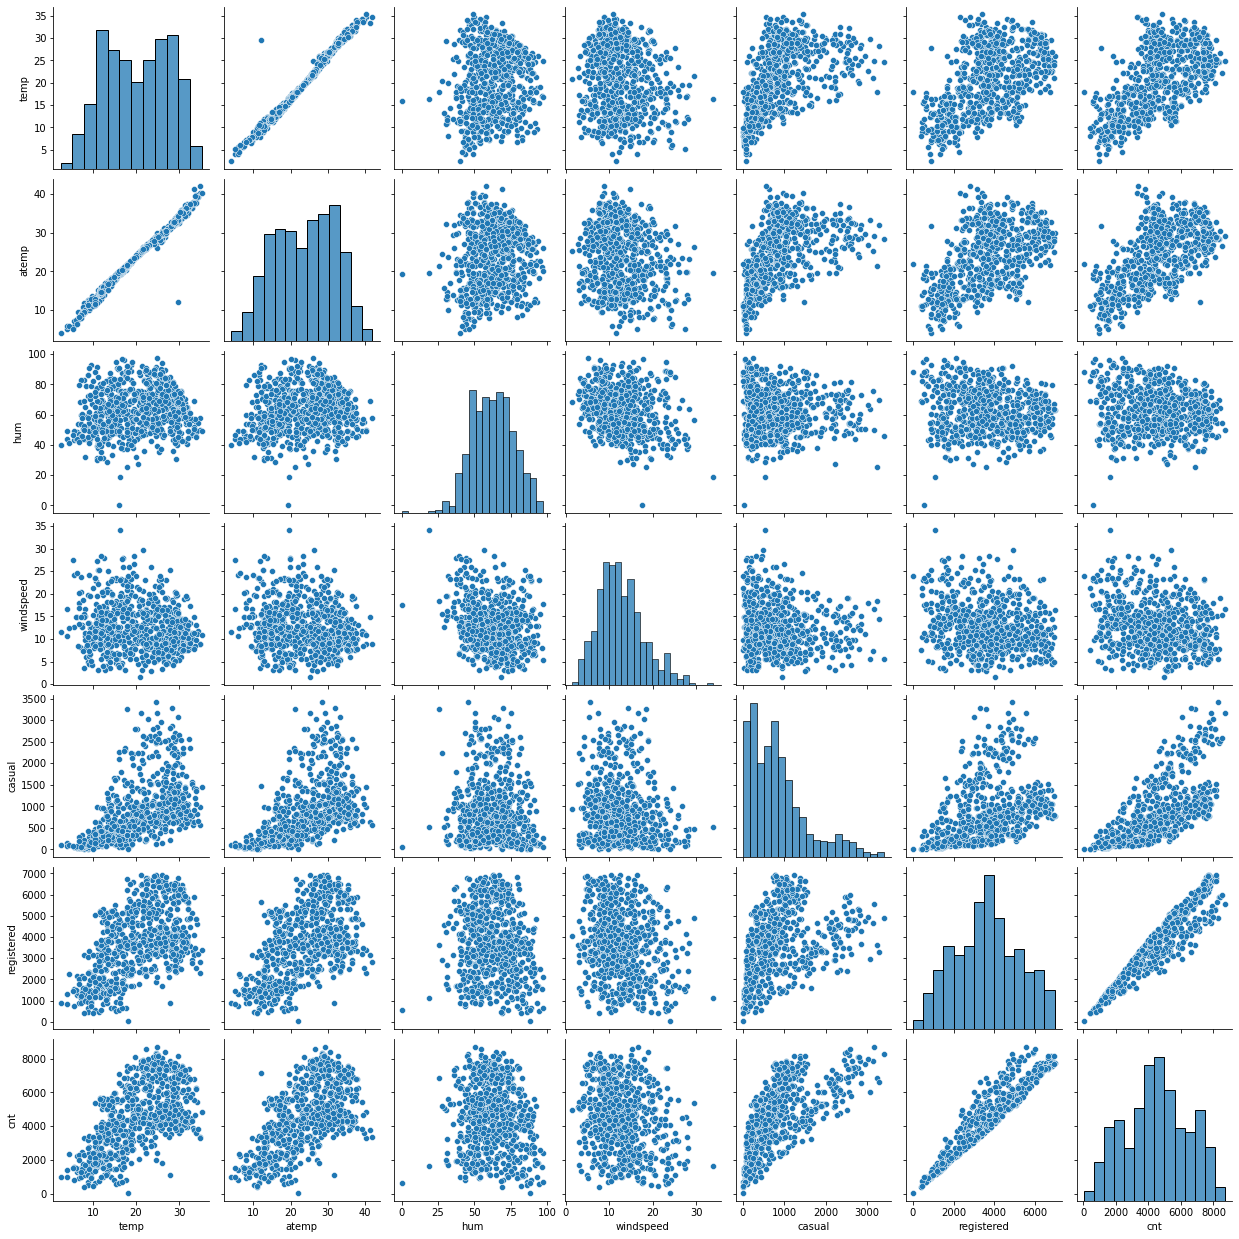

In [970]:
num_variables = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(bikesharing[num_variables])
plt.show()

Before plotting graphs for Categorical varaibles, let's map the numerical value for different levels with their corresponding meaning.

In [971]:
# mapping season levels with their respective season names.
bikesharing['season'] = bikesharing[['season']].apply(lambda x: x.map({ 1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bikesharing.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018  spring   0     1        0        1           1           2   
1  02-01-2018  spring   0     1        0        2           1           2   
2  03-01-2018  spring   0     1        0        3           1           1   
3  04-01-2018  spring   0     1        0        4           1           1   
4  05-01-2018  spring   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [972]:
# mapping months with respective month names
bikesharing['mnth'] = bikesharing[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

In [973]:
#mapping weekdays with their respective names
bikesharing['weekday'] = bikesharing[['weekday']].apply(lambda x: x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}))
bikesharing.head()

dteday  season  yr mnth  holiday weekday  workingday  weathersit  \
0  01-01-2018  spring   0  Jan        0     Mon           1           2   
1  02-01-2018  spring   0  Jan        0     Tue           1           2   
2  03-01-2018  spring   0  Jan        0     Wed           1           1   
3  04-01-2018  spring   0  Jan        0     Thu           1           1   
4  05-01-2018  spring   0  Jan        0     Fri           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

Now let's map the weathersit with the respective weather situation 1: Clear 2: Mist 3: Light Rain 4: Heavy Rain

In [974]:
#mapping weather situation with the respective name using above mention convention
bikesharing['weathersit'] = bikesharing[['weathersit']].apply(lambda x: x.map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}))
bikesharing.head()

dteday  season  yr mnth  holiday weekday  workingday weathersit  \
0  01-01-2018  spring   0  Jan        0     Mon           1       Mist   
1  02-01-2018  spring   0  Jan        0     Tue           1       Mist   
2  03-01-2018  spring   0  Jan        0     Wed           1      Clear   
3  04-01-2018  spring   0  Jan        0     Thu           1      Clear   
4  05-01-2018  spring   0  Jan        0     Fri           1      Clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

## Visualizing the categorical variables

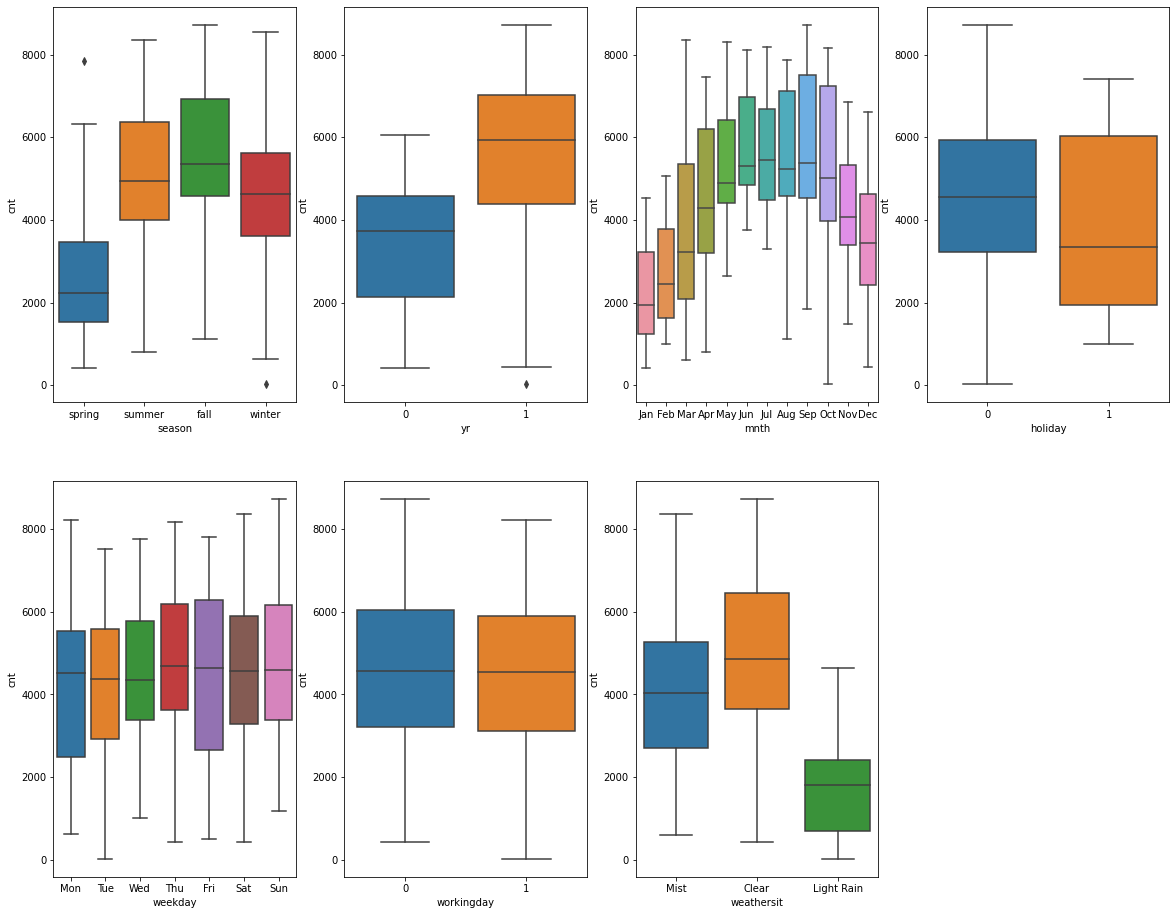

In [975]:
#using subplot to plot boxplot for each categorical variable against cnt
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=bikesharing)
plt.show()

## Create Dummy Variables
### Now let's create dummy variables for the categorical variables having more than two levels

In [976]:
def create_dummies(df, var_list):
    for variable in var_list:
        dummy_vars = pd.get_dummies(df[variable], drop_first=True)
        df = pd.concat([df, dummy_vars], axis=1)
        df = df.drop(columns=variable)
    return df

In [977]:
bikesharing = create_dummies(bikesharing, ['season', 'mnth', 'weekday', 'weathersit'])
bikesharing.head()

dteday  yr  holiday  workingday       temp     atemp      hum  \
0  01-01-2018   0        0           1  14.110847  18.18125  80.5833   
1  02-01-2018   0        0           1  14.902598  17.68695  69.6087   
2  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  spring  summer  winter  Aug  Dec  Feb  \
0  10.749882     331         654   985       1       0       0    0    0    0   
1  16.652113     131         670   801       1       0       0    0    0    0   
2  16.636703     120        1229  1349       1       0       0    0    0    0   
3  10.739832     108        1454  1562       1       0       0    0    0    0   
4  12.522300      82        1518  1600       1       0       0    0    0    0   

   Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0    1    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    1    0    0    0    0    0    0    0    0    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    0    0    0    0    1   
3    1    0    0    0    0    0    0    0    0    0    0    1    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   Light Rain  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0

In [978]:
bikesharing.shape

(730, 33)

In [979]:
bikesharing = bikesharing[['cnt']+[c for c in bikesharing if c != 'cnt']]
bikesharing.head()

cnt      dteday  yr  holiday  workingday       temp     atemp      hum  \
0   985  01-01-2018   0        0           1  14.110847  18.18125  80.5833   
1   801  02-01-2018   0        0           1  14.902598  17.68695  69.6087   
2  1349  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3  1562  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4  1600  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered  spring  summer  winter  Aug  Dec  Feb  Jan  \
0  10.749882     331         654       1       0       0    0    0    0    1   
1  16.652113     131         670       1       0       0    0    0    0    1   
2  16.636703     120        1229       1       0       0    0    0    0    1   
3  10.739832     108        1454       1       0       0    0    0    0    1   
4  12.522300      82        1518       1       0       0    0    0    0    1   

   Jul  Jun  Mar  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    1   
3    0    0    0    0    0    0    0    0    0    0    1    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0   

   Light Rain  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0

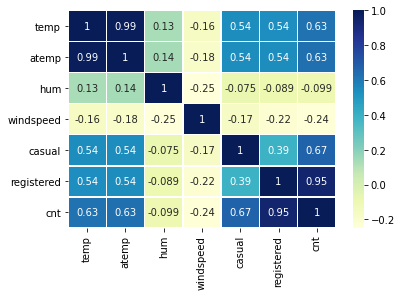

In [980]:
sns.heatmap(bikesharing[num_variables].corr(), cmap='YlGnBu', annot=True, linewidths=.5)
plt.show()

# Feature Engineering
## Remove the unwanted variables
The registered and casual variable are redundant to cnt variable, as cnt is sum of these two variables. So, having these variables for analysis will impact significance of all other variables. So, first remove these two variables.

In [981]:
bikesharing.drop(columns=['registered', 'casual'], axis=1, inplace=True)
bikesharing.head()

cnt      dteday  yr  holiday  workingday       temp     atemp      hum  \
0   985  01-01-2018   0        0           1  14.110847  18.18125  80.5833   
1   801  02-01-2018   0        0           1  14.902598  17.68695  69.6087   
2  1349  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3  1562  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4  1600  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  spring  summer  winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  \
0  10.749882       1       0       0    0    0    0    1    0    0    0    0   
1  16.652113       1       0       0    0    0    0    1    0    0    0    0   
2  16.636703       1       0       0    0    0    0    1    0    0    0    0   
3  10.739832       1       0       0    0    0    0    1    0    0    0    0   
4  12.522300       1       0       0    0    0    0    1    0    0    0    0   

   Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Light Rain  Mist  
0    0    0    0    1    0    0    0    0    0           0     1  
1    0    0    0    0    0    0    0    1    0           0     1  
2    0    0    0    0    0    0    0    0    1           0     0  
3    0    0    0    0    0    0    1    0    0           0     0  
4    0    0    0    0    0    0    0    0    0           0     0

dteday is of no use for the analysis, as we have already got the day and month for the analysis. So drop dteday

In [982]:
bikesharing.drop(columns='dteday', inplace=True)
bikesharing.head()

cnt  yr  holiday  workingday       temp     atemp      hum  windspeed  \
0   985   0        0           1  14.110847  18.18125  80.5833  10.749882   
1   801   0        0           1  14.902598  17.68695  69.6087  16.652113   
2  1349   0        0           1   8.050924   9.47025  43.7273  16.636703   
3  1562   0        0           1   8.200000  10.60610  59.0435  10.739832   
4  1600   0        0           1   9.305237  11.46350  43.6957  12.522300   

   spring  summer  winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0       1       0       0    0    0    0    1    0    0    0    0    0    0   
1       1       0       0    0    0    0    1    0    0    0    0    0    0   
2       1       0       0    0    0    0    1    0    0    0    0    0    0   
3       1       0       0    0    0    0    1    0    0    0    0    0    0   
4       1       0       0    0    0    0    1    0    0    0    0    0    0   

   Sep  Mon  Sat  Sun  Thu  Tue  Wed  Light Rain  Mist  
0    0    1    0    0    0    0    0           0     1  
1    0    0    0    0    0    1    0           0     1  
2    0    0    0    0    0    0    1           0     0  
3    0    0    0    0    1    0    0           0     0  
4    0    0    0    0    0    0    0           0     0

We will also drop the 'temp' variable as it is highly correlated with 'atemp' variable, so without losing any data we can drop 'temp'

though 'hum' variable is weakly correlated with target variable, we will keep it for the further analysis.

In [983]:
bikesharing.drop(columns='temp', axis=1, inplace=True)
bikesharing.head()

cnt  yr  holiday  workingday     atemp      hum  windspeed  spring  \
0   985   0        0           1  18.18125  80.5833  10.749882       1   
1   801   0        0           1  17.68695  69.6087  16.652113       1   
2  1349   0        0           1   9.47025  43.7273  16.636703       1   
3  1562   0        0           1  10.60610  59.0435  10.739832       1   
4  1600   0        0           1  11.46350  43.6957  12.522300       1   

   summer  winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Mon  \
0       0       0    0    0    0    1    0    0    0    0    0    0    0    1   
1       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
2       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
3       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
4       0       0    0    0    0    1    0    0    0    0    0    0    0    0   

   Sat  Sun  Thu  Tue  Wed  Light Rain  Mist  
0    0    0    0    0    0           0     1  
1    0    0    0    1    0           0     1  
2    0    0    0    0    1           0     0  
3    0    0    1    0    0           0     0  
4    0    0    0    0    0           0     0

In [984]:
# Redifine the numerical varaibles
num_variables = ['atemp', 'hum','windspeed', 'cnt']

### Now plotting the correlation matrix for all the features in dataset

In [985]:
#changing the position of cnt varaible for better vizualization
bikesharing = bikesharing[['cnt']+[c for c in bikesharing if c != 'cnt']]


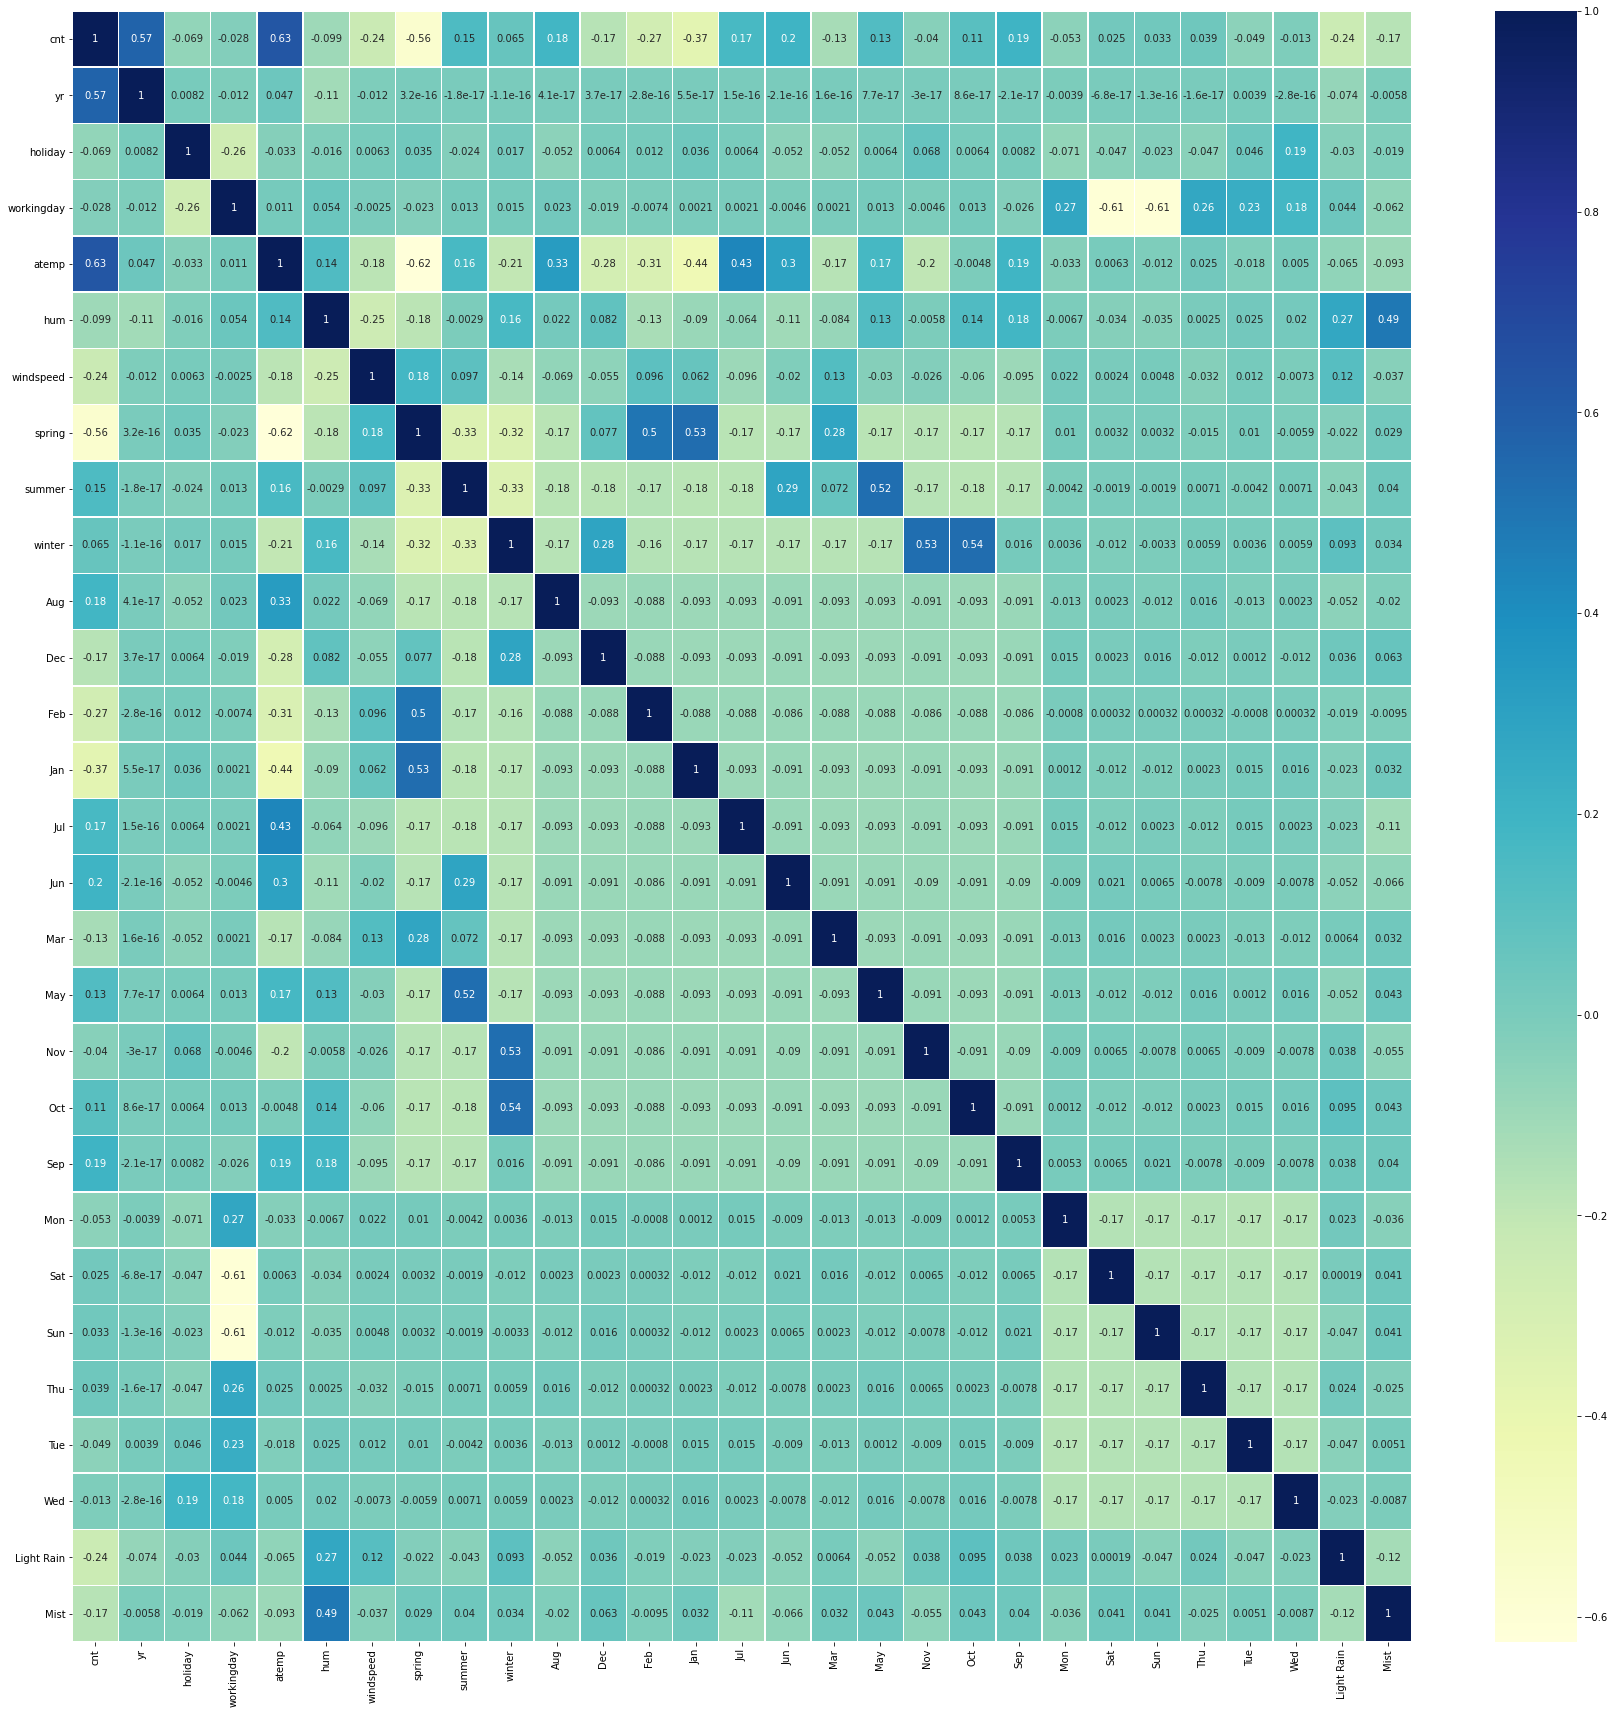

In [986]:
#using heatmap to plot correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(bikesharing.corr(), cmap='YlGnBu', annot=True, linewidths=.5)
plt.show()

## Now let's split the data into train and test data

In [987]:
# splitting train and test data in 70, 30 ratio
bikesharing_train, bikesharing_test = train_test_split(bikesharing, train_size=0.7, test_size=0.3)

# Scaling the features
Rescale the numerical features, for scaling we will use MinMax scaling      
    

In [988]:
# create the object of minmax scaler
scaler = MinMaxScaler()

In [989]:
# rescaling the numerical variables 
bikesharing_train[num_variables] = scaler.fit_transform(bikesharing_train[num_variables])
bikesharing_train.head()

cnt  yr  holiday  workingday     atemp       hum  windspeed  spring  \
304  0.465486   0        0           1  0.399641  0.704594   0.200505       0   
443  0.698458   1        0           1  0.590980  0.832546   0.169763       1   
427  0.391279   1        0           1  0.272393  0.415629   0.628316       1   
539  0.790267   1        0           1  0.774576  0.493774   0.221904       0   
27   0.131730   0        0           0  0.164574  0.817219   0.174125       1   

     summer  winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  \
304       0       1    0    0    0    0    0    0    0    0    1    0    0   
443       0       0    0    0    0    0    0    0    1    0    0    0    0   
427       0       0    0    0    0    0    0    0    1    0    0    0    0   
539       0       0    0    0    0    0    0    1    0    0    0    0    0   
27        0       0    0    0    0    1    0    0    0    0    0    0    0   

     Mon  Sat  Sun  Thu  Tue  Wed  Light Rain  Mist  
304    0    0    0    1    0    0           0     0  
443    0    0    0    0    0    1           0     0  
427    1    0    0    0    0    0           0     0  
539    1    0    0    0    0    0           0     0  
27     0    0    1    0    0    0           0     1

### Splitting independent variables and dependent variable for train dataset

In [990]:
# splitting train data into target variable and independent variables
y_train = bikesharing_train.pop('cnt')
X_train = bikesharing_train

In [991]:
# check the number of independent variables
X_train.shape

(510, 28)

# Building linear regression model on train dataset

In [992]:
# creating object of Linear Regression and fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### For feature selection we are using Recursive Feature Elimination (RFE) 

In [993]:
# selecting top 10 features using Recursive Feature Elimination (RFE)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [994]:
# listing the features with the support and ranking from RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 17),
 ('winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 3),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 16),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 12),
 ('Sun', False, 14),
 ('Thu', False, 19),
 ('Tue', False, 8),
 ('Wed', False, 18),
 ('Light Rain', True, 1),
 ('Mist', False, 4)]

In [995]:
#selecting top 12 columns suggested by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Jul',
       'Sep', 'Light Rain'],
      dtype='object')

In [996]:
# creating new datafarme with only selected features
X_train_rfe = X_train[cols]
X_train_rfe.head()

yr  holiday     atemp       hum  windspeed  spring  winter  Jul  Sep  \
304   0        0  0.399641  0.704594   0.200505       0       1    0    0   
443   1        0  0.590980  0.832546   0.169763       1       0    0    0   
427   1        0  0.272393  0.415629   0.628316       1       0    0    0   
539   1        0  0.774576  0.493774   0.221904       0       0    0    0   
27    0        0  0.164574  0.817219   0.174125       1       0    0    0   

     Light Rain  
304           0  
443           0  
427           0  
539           0  
27            0

### Building Linear Regression Model using OLS method on selected set of features

In [997]:
# for using OLS function from statsmodel libraary we need to add constant varaible
X_train_lm = sm.add_constant(X_train_rfe)

In [998]:
# using OLS method from statsmodel to perform linear regression on selected features
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.87e-176
Time:                        23:29:08   Log-Likelihood:                 483.95
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     499   BIC:                            -899.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4043      0.031     12.839      0.0

### Now let's calcualte Variance Inflation Factor (VIF) for checking multicollinearity

In [999]:
# dropping constant variable to check VIF
X = X_train_lm.drop(columns='const', axis=1)

In [1000]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  13.65
2       atemp  11.57
4   windspeed   4.08
5      spring   2.22
0          yr   2.04
6      winter   1.92
7         Jul   1.42
8         Sep   1.14
9  Light Rain   1.12
1     holiday   1.05

Here the VIF for hum variable is very high therfore dropping the hum variable and training the model again

In [1001]:
X_train_new = X_train_lm.drop(columns='hum', axis=1)
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 17 May 2021   Prob (F-statistic):          9.64e-162
Time:                        23:29:08   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -873.7
Df Residuals:                     500   BIC:                            -831.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2188      0.025      8.676      0.0

In [1002]:
# calculate VIF agin for all the present features
X = X_train_new.drop(columns='const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       atemp  4.22
3   windspeed  3.98
0          yr  2.04
4      spring  1.63
5      winter  1.38
6         Jul  1.36
7         Sep  1.14
8  Light Rain  1.08
1     holiday  1.05

Here the values of VIF for features are low and also p-value is also less than 0.05 therefor we can say that the selected features are significant and there is no multicollinearity among variables.

# Residual Analysis
We need to check following:
- The errors are normally distributed and the expected value for errors is zero
- The error terms should have constant variance , i.e. errors should follow Homoscedasticity
- The errors don't follow autocorrelation, that is next error term doesn't depend on the previous error term
- There is linear relationship between indpendent variables and dependent variables


In [1003]:
# predicting the target variable usimg the model and store it to y_train_predict
y_train_predict = lm.predict(X_train_new)

In [1004]:
# calculating the residual for each predicted value
residual = y_train-y_train_predict

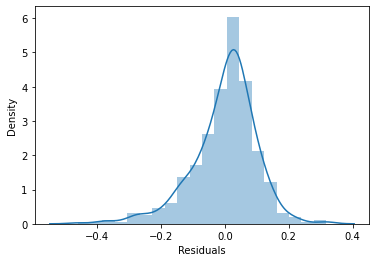

In [1005]:
# plotting distribution plot the errors and verifying the assumptions
sns.distplot(residual, bins=20)
plt.xlabel("Residuals")
plt.show()

As here you can see the mean of all error values is equal to zero and also the above distribution plot is identical to normal distribution


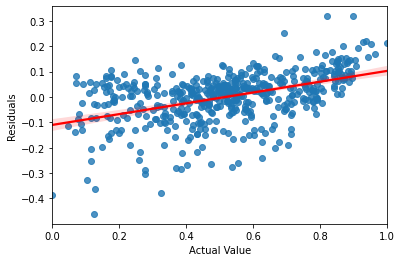

In [1006]:
sns.regplot(x=y_train, y=residual, line_kws={"color": "red"})
plt.xlabel("Actual Value")
plt.ylabel("Residuals")
plt.show()

As from the above figure we can say that the variance of error terms does not increases as the error values changes. Therfore we can say the variance is constant for errors thus errors follow Homoscedasticity

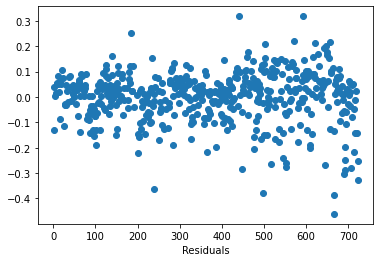

In [1007]:
plt.plot(residual, 'o')
plt.xlabel("Residuals")
plt.show()

As from the above figure, we can say that as the error term changes there is no pattern formed. Hence we can say that there is not autocorrelation between residuals  

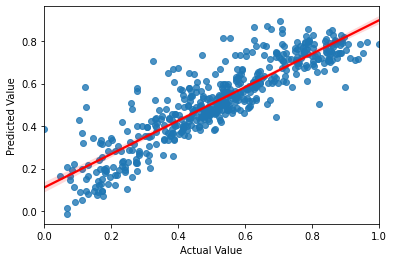

In [1008]:
sns.regplot(x=y_train, y=y_train_predict, line_kws={"color": "red"})
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

As from the above figure we can say that Predicted Values and Actual values have a linear relationship, we can say that the independent variables and dependent variable have linear relationship

### Hence we can say that the Linear Regression model follows all the assumptions.

In [1009]:
X_train_new = X_train_new.drop(columns='const', axis=1)

## Repeat the steps for test dataset what we did with train dataset

### Scalling the test dataset w.r.t. scale used for train dataset

In [1010]:
# we only need to transform the test dataset with respect to the fit we perform on train dataset
bikesharing_test[num_variables] = scaler.transform(bikesharing_test[num_variables])
bikesharing_test.head()

cnt  yr  holiday  workingday     atemp       hum  windspeed  spring  \
117  0.464335   0        0           0  0.645626  0.722198   0.598943       0   
603  0.793258   1        0           1  0.748108  0.752684   0.185805       0   
543  0.788886   1        0           1  0.776278  0.435380   0.278068       0   
431  0.616659   1        0           1  0.572138  0.584800   0.858328       1   
172  0.515992   0        0           1  0.801056  0.729068   0.279384       0   

     summer  winter  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  \
117       1       0    0    0    0    0    0    0    0    0    0    0    0   
603       0       0    1    0    0    0    0    0    0    0    0    0    0   
543       0       0    0    0    0    0    0    1    0    0    0    0    0   
431       0       0    0    0    0    0    0    0    1    0    0    0    0   
172       0       0    0    0    0    0    0    1    0    0    0    0    0   

     Mon  Sat  Sun  Thu  Tue  Wed  Light Rain  Mist  
117    0    1    0    0    0    0           0     1  
603    0    0    0    0    1    0           0     0  
543    0    0    0    0    0    0           0     0  
431    0    0    0    0    0    0           0     0  
172    0    0    0    0    0    0           0     0

### Splitting independent variables and dependent variable for test dataset

In [1011]:
# storing the cnt variable in y_test and rest of variables in X_test
y_test = bikesharing_test.pop('cnt')
X_test = bikesharing_test

In [1012]:
# selecting the features which were used in train dataset for building the model
X_test_rfe = X_test[X_train_new.columns]
X_test_lm = sm.add_constant(X_test_rfe)
X_test_lm.head()

const  yr  holiday     atemp  windspeed  spring  winter  Jul  Sep  \
117    1.0   0        0  0.645626   0.598943       0       0    0    0   
603    1.0   1        0  0.748108   0.185805       0       0    0    0   
543    1.0   1        0  0.776278   0.278068       0       0    0    0   
431    1.0   1        0  0.572138   0.858328       1       0    0    0   
172    1.0   0        0  0.801056   0.279384       0       0    0    0   

     Light Rain  
117           0  
603           0  
543           0  
431           0  
172           0

## Predicting the target variable on test dataset

In [1013]:
#using same model which was used for train dataset, predicting the target variable in test dataset 
y_pred = lm.predict(X_test_lm)

### Checking the performance metrics for Linear Regression model

In [1014]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203421552701056

As you can see the r-squared value for test dataset is greater than r-squared value for train dataset, then we can say the model is not doing overfitting and the prediction results are good.